**Import Libraries & Load Data**

In [1]:
import sys
!{sys.executable} -m pip install pandas numpy matplotlib seaborn



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
print(pd.__version__)

2.3.0


In [4]:
df = pd.read_csv('/home/rafi/Project/Walmart_project/Walmart.csv')

**Data Cleaning & Preprocessing**

In [5]:
df.shape

(10051, 11)

In [6]:
df.head()

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin
0,1,WALM003,San Antonio,Health and beauty,$74.69,7.0,05/01/19,13:08:00,Ewallet,9.1,0.48
1,2,WALM048,Harlingen,Electronic accessories,$15.28,5.0,08/03/19,10:29:00,Cash,9.6,0.48
2,3,WALM067,Haltom City,Home and lifestyle,$46.33,7.0,03/03/19,13:23:00,Credit card,7.4,0.33
3,4,WALM064,Bedford,Health and beauty,$58.22,8.0,27/01/19,20:33:00,Ewallet,8.4,0.33
4,5,WALM013,Irving,Sports and travel,$86.31,7.0,08/02/19,10:37:00,Ewallet,5.3,0.48


here, unit price has Dollar sign and we would remove it and convert it into float to use it in further calculation.

In [7]:
df.describe()

,invoice_id,quantity,rating,profit_margin
count,10051.000000,10020.000000,10051.000000,10051.000000
mean,5025.741220,2.353493,5.825659,0.393791
std,2901.174372,1.602658,1.763991,0.090669
min,1.000000,1.000000,3.000000,0.180000
25%,2513.500000,1.000000,4.000000,0.330000
50%,5026.000000,2.000000,6.000000,0.330000
75%,7538.500000,3.000000,7.000000,0.480000
max,10000.000000,10.000000,10.000000,0.570000


we can see this dataset contains 10,051 entries for invoice_id and rating, but only 10,020 for quantity, indicating 31 missing values in the quantity column that may need cleaning.

the describe function shows only the number part as we can see the unit price isn't here as it's still in the string value. so , we need to convert that too. 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10051 entries, 0 to 10050
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_id      10051 non-null  int64  
 1   Branch          10051 non-null  object 
 2   City            10051 non-null  object 
 3   category        10051 non-null  object 
 4   unit_price      10020 non-null  object 
 5   quantity        10020 non-null  float64
 6   date            10051 non-null  object 
 7   time            10051 non-null  object 
 8   payment_method  10051 non-null  object 
 9   rating          10051 non-null  float64
 10  profit_margin   10051 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 863.9+ KB


here, we can see unit_price and quantity has 31 less Non_Null Value. 

In [9]:
# missing values count

df.isnull().sum()

invoice_id         0
Branch             0
City               0
category           0
unit_price        31
quantity          31
date               0
time               0
payment_method     0
rating             0
profit_margin      0
dtype: int64

In [10]:
# all duplicate count 

df.duplicated().sum()

np.int64(51)

that means we have 51 duplicate rows in our dataset. we need to get rid of them. 

In [11]:
df.drop_duplicates(inplace= True)

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df.shape

(10000, 11)

means, we have 51 less value.

In [14]:
df.isnull().sum()

invoice_id         0
Branch             0
City               0
category           0
unit_price        31
quantity          31
date               0
time               0
payment_method     0
rating             0
profit_margin      0
dtype: int64

In [15]:
# dropping all rows with missing values

df.dropna(inplace = True)

In [16]:
df.shape

(9969, 11)

In [17]:
df['unit_price'].str.replace('$', '')

df.head()

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin
0,1,WALM003,San Antonio,Health and beauty,$74.69,7.0,05/01/19,13:08:00,Ewallet,9.1,0.48
1,2,WALM048,Harlingen,Electronic accessories,$15.28,5.0,08/03/19,10:29:00,Cash,9.6,0.48
2,3,WALM067,Haltom City,Home and lifestyle,$46.33,7.0,03/03/19,13:23:00,Credit card,7.4,0.33
3,4,WALM064,Bedford,Health and beauty,$58.22,8.0,27/01/19,20:33:00,Ewallet,8.4,0.33
4,5,WALM013,Irving,Sports and travel,$86.31,7.0,08/02/19,10:37:00,Ewallet,5.3,0.48


unit_price didn't change in the dataset

In [18]:
df['unit_price'] = df['unit_price'].replace('[\$,]', '', regex=True).astype(float)
df.head()

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin
0,1,WALM003,San Antonio,Health and beauty,74.69,7.0,05/01/19,13:08:00,Ewallet,9.1,0.48
1,2,WALM048,Harlingen,Electronic accessories,15.28,5.0,08/03/19,10:29:00,Cash,9.6,0.48
2,3,WALM067,Haltom City,Home and lifestyle,46.33,7.0,03/03/19,13:23:00,Credit card,7.4,0.33
3,4,WALM064,Bedford,Health and beauty,58.22,8.0,27/01/19,20:33:00,Ewallet,8.4,0.33
4,5,WALM013,Irving,Sports and travel,86.31,7.0,08/02/19,10:37:00,Ewallet,5.3,0.48


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9969 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_id      9969 non-null   int64  
 1   Branch          9969 non-null   object 
 2   City            9969 non-null   object 
 3   category        9969 non-null   object 
 4   unit_price      9969 non-null   float64
 5   quantity        9969 non-null   float64
 6   date            9969 non-null   object 
 7   time            9969 non-null   object 
 8   payment_method  9969 non-null   object 
 9   rating          9969 non-null   float64
 10  profit_margin   9969 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 934.6+ KB


In [20]:
df.columns

Index(['invoice_id', 'Branch', 'City', 'category', 'unit_price', 'quantity',
       'date', 'time', 'payment_method', 'rating', 'profit_margin'],
      dtype='object')

we need to find the total price of elements.

In [21]:
df['total_price'] = df['unit_price'] * df['quantity']
df.head()

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin,total_price
0,1,WALM003,San Antonio,Health and beauty,74.69,7.0,05/01/19,13:08:00,Ewallet,9.1,0.48,522.83
1,2,WALM048,Harlingen,Electronic accessories,15.28,5.0,08/03/19,10:29:00,Cash,9.6,0.48,76.40
2,3,WALM067,Haltom City,Home and lifestyle,46.33,7.0,03/03/19,13:23:00,Credit card,7.4,0.33,324.31
3,4,WALM064,Bedford,Health and beauty,58.22,8.0,27/01/19,20:33:00,Ewallet,8.4,0.33,465.76
4,5,WALM013,Irving,Sports and travel,86.31,7.0,08/02/19,10:37:00,Ewallet,5.3,0.48,604.17


In [22]:
df['profit'] = df['total_price'] * df['profit_margin']
df.head()

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin,total_price,profit
0,1,WALM003,San Antonio,Health and beauty,74.69,7.0,05/01/19,13:08:00,Ewallet,9.1,0.48,522.83,250.9584
1,2,WALM048,Harlingen,Electronic accessories,15.28,5.0,08/03/19,10:29:00,Cash,9.6,0.48,76.40,36.6720
2,3,WALM067,Haltom City,Home and lifestyle,46.33,7.0,03/03/19,13:23:00,Credit card,7.4,0.33,324.31,107.0223
3,4,WALM064,Bedford,Health and beauty,58.22,8.0,27/01/19,20:33:00,Ewallet,8.4,0.33,465.76,153.7008
4,5,WALM013,Irving,Sports and travel,86.31,7.0,08/02/19,10:37:00,Ewallet,5.3,0.48,604.17,290.0016


In [23]:
# Inspect dataframe
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 9969 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_id      9969 non-null   int64  
 1   Branch          9969 non-null   object 
 2   City            9969 non-null   object 
 3   category        9969 non-null   object 
 4   unit_price      9969 non-null   float64
 5   quantity        9969 non-null   float64
 6   date            9969 non-null   object 
 7   time            9969 non-null   object 
 8   payment_method  9969 non-null   object 
 9   rating          9969 non-null   float64
 10  profit_margin   9969 non-null   float64
 11  total_price     9969 non-null   float64
 12  profit          9969 non-null   float64
dtypes: float64(6), int64(1), object(6)
memory usage: 1.1+ MB


,invoice_id,unit_price,quantity,rating,profit_margin,total_price,profit
count,9969.000000,9969.000000,9969.000000,9969.000000,9969.000000,9969.000000,9969.000000
mean,5010.116561,50.622142,2.355602,5.828839,0.393744,121.348819,47.762005
std,2886.217349,21.203766,1.605455,1.763723,0.090659,112.678040,47.179160
min,1.000000,10.080000,1.000000,3.000000,0.180000,10.170000,2.700000
25%,2524.000000,32.000000,1.000000,4.000000,0.330000,54.000000,20.460000
50%,5016.000000,51.000000,2.000000,6.000000,0.330000,88.000000,34.650000
75%,7508.000000,69.000000,3.000000,7.000000,0.480000,156.000000,60.480000
max,10000.000000,99.960000,10.000000,10.000000,0.570000,993.000000,507.716100


**Exploratory Data Analysis (EDA)**

In [24]:
# Total and Average Sales, Total profit

print("Total Sales: $", round(df['total_price'].sum(), 2))
print("Average Transaction: $", round(df['total_price'].mean(), 2))
print("Total profit: $", round(df['profit'].sum(), 2))

Total Sales: $ 1209726.38
Average Transaction: $ 121.35
Total profit: $ 476139.43


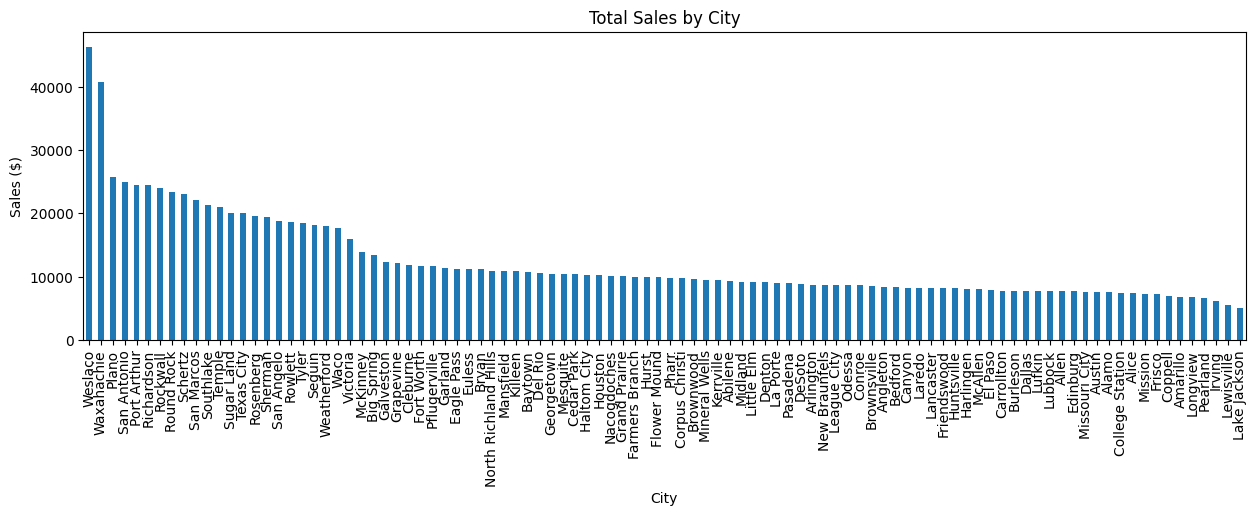

In [25]:
# Sales by City

city_sales = df.groupby('City')['total_price'].sum().sort_values(ascending=False)
city_sales.plot(kind='bar', title='Total Sales by City', figsize=(15,4))
plt.ylabel('Sales ($)')
plt.show()

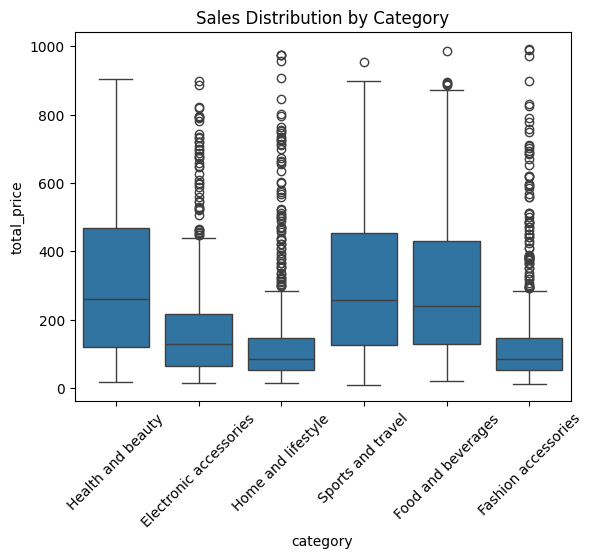

In [26]:
# Category-wise Sales Distribution

sns.boxplot(x='category', y='total_price', data=df)
plt.xticks(rotation=45)
plt.title('Sales Distribution by Category')
plt.show()

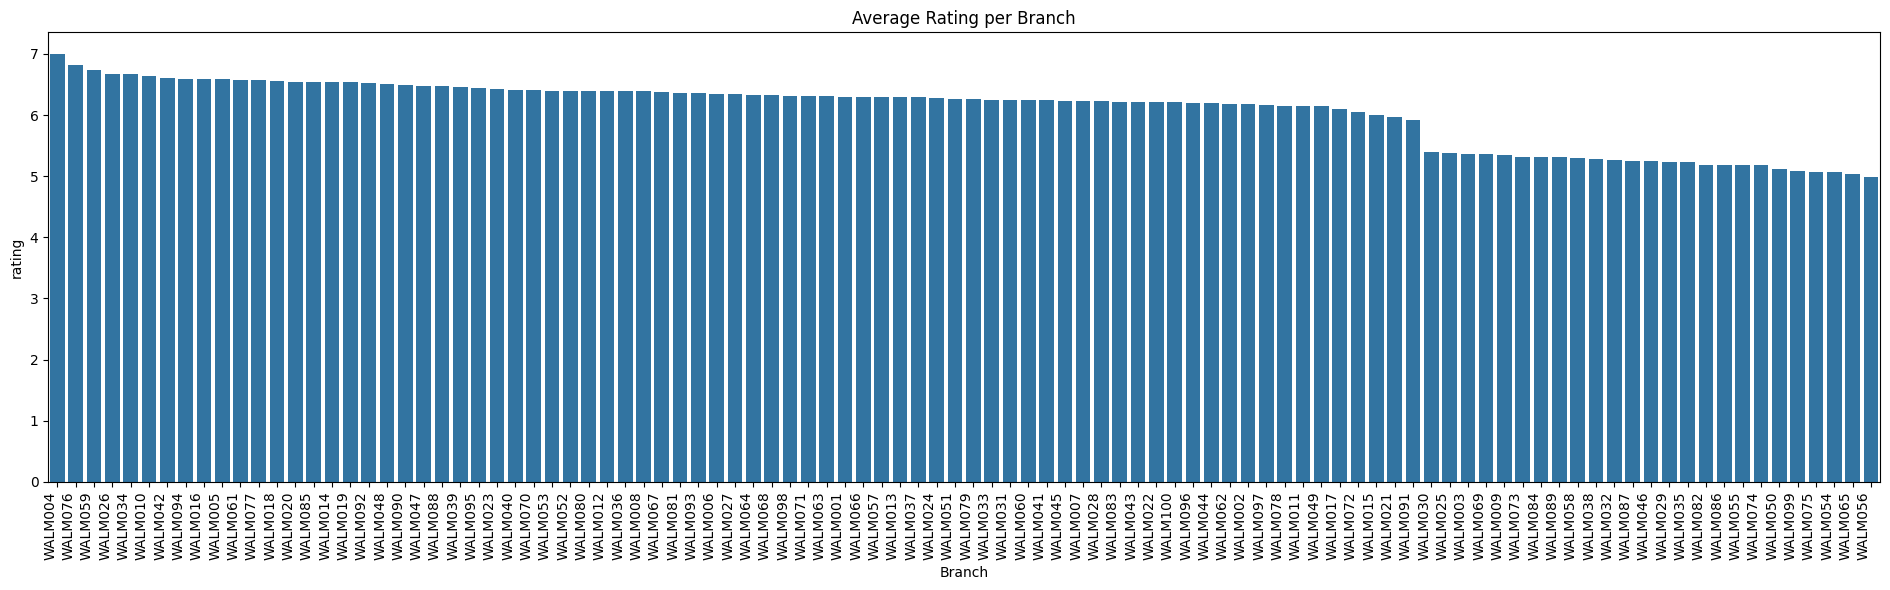

In [27]:
# Average Ratings by Branch
avg_rating = df.groupby('Branch')['rating'].mean().reset_index().sort_values(by='rating', ascending=False)
plt.figure(figsize=(19,6))
sns.barplot(x='Branch', y='rating', data=avg_rating)
plt.title('Average Rating per Branch')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

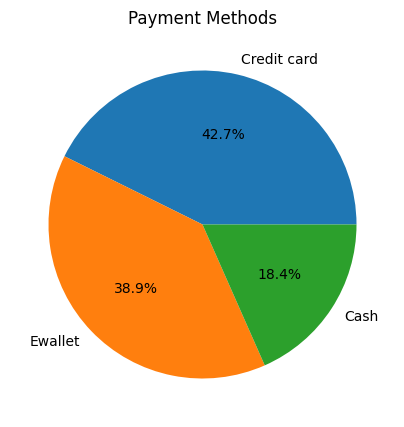

In [28]:
# Payment Method Share
df['payment_method'].value_counts().plot.pie(autopct='%1.1f%%', title='Payment Methods', figsize=(5,5))
plt.ylabel('')
plt.show()

**Advanced Insights**

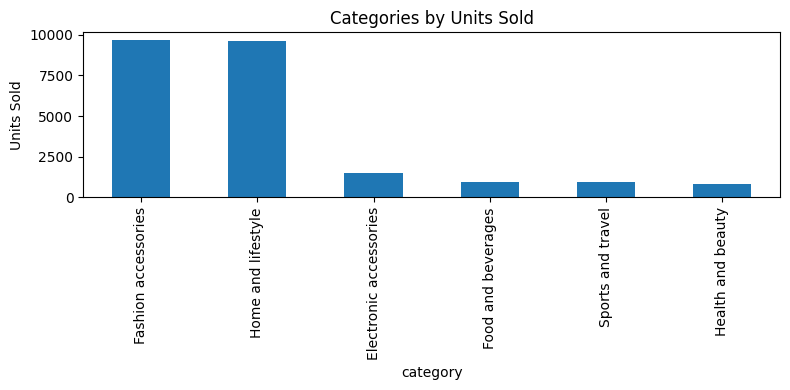

In [29]:
# Selling Products (based on quantity)

top_products = df.groupby('category')['quantity'].sum().sort_values(ascending=False)
top_products.plot(kind='bar', title='Categories by Units Sold', figsize=(8,4))
plt.ylabel('Units Sold')
plt.tight_layout()
plt.show()

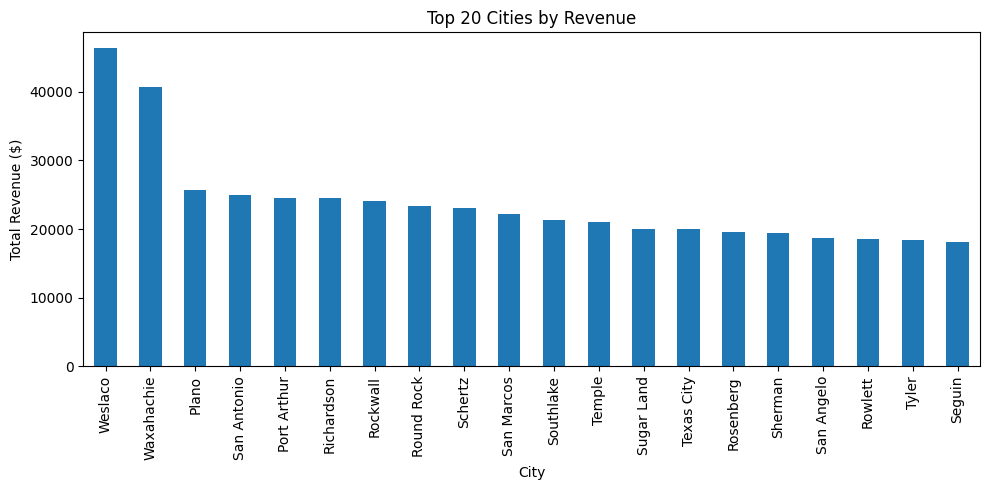

In [30]:
# Highest Earning Cities

top_cities = df.groupby('City')['total_price'].sum().sort_values(ascending=False).head(20)
plt.figure(figsize=(10,5))
top_cities.plot(kind='bar', title='Top 20 Cities by Revenue')
plt.ylabel('Total Revenue ($)')
plt.tight_layout()
plt.show()

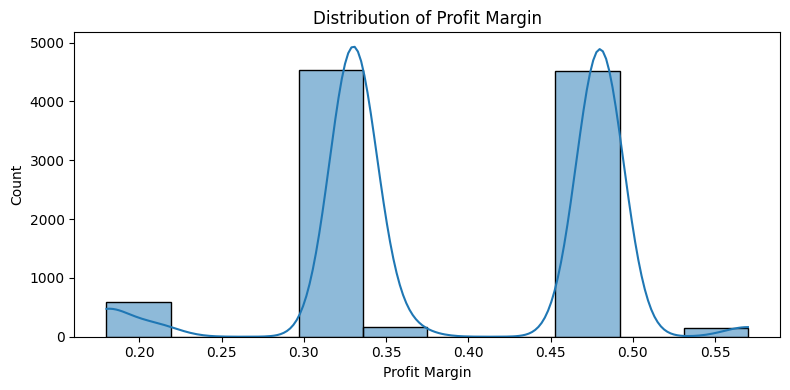

In [31]:
# Profit Margin Distribution

plt.figure(figsize=(8,4))
sns.histplot(df['profit_margin'], bins=10, kde=True)
plt.title('Distribution of Profit Margin')
plt.xlabel('Profit Margin')
plt.tight_layout()
plt.show()

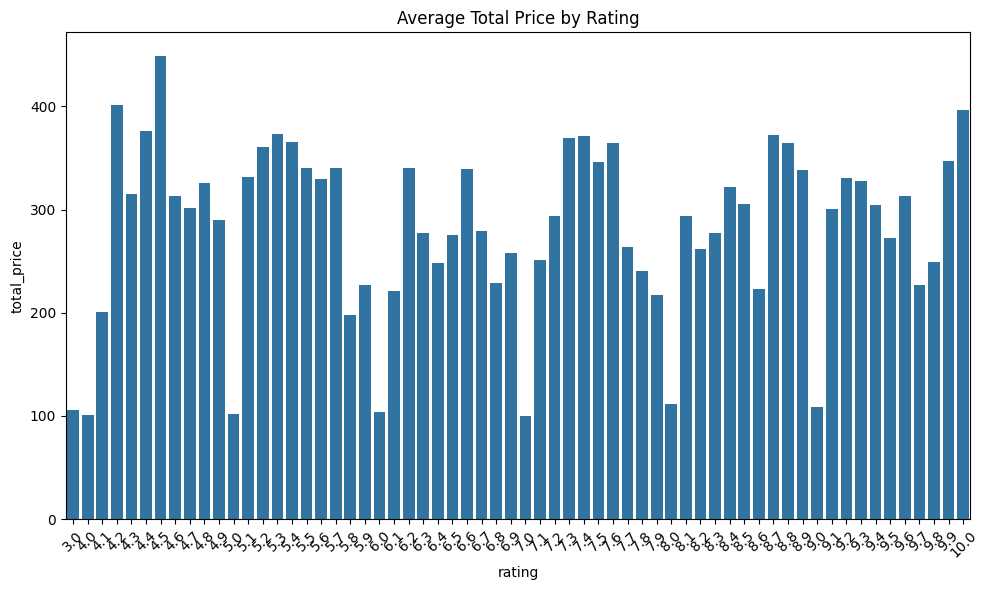

In [32]:
# Profit by Category

plt.figure(figsize=(10,6))
avg_sales = df.groupby('rating')['total_price'].mean().reset_index()
sns.barplot(x='rating', y='total_price', data=avg_sales)
plt.title('Average Total Price by Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

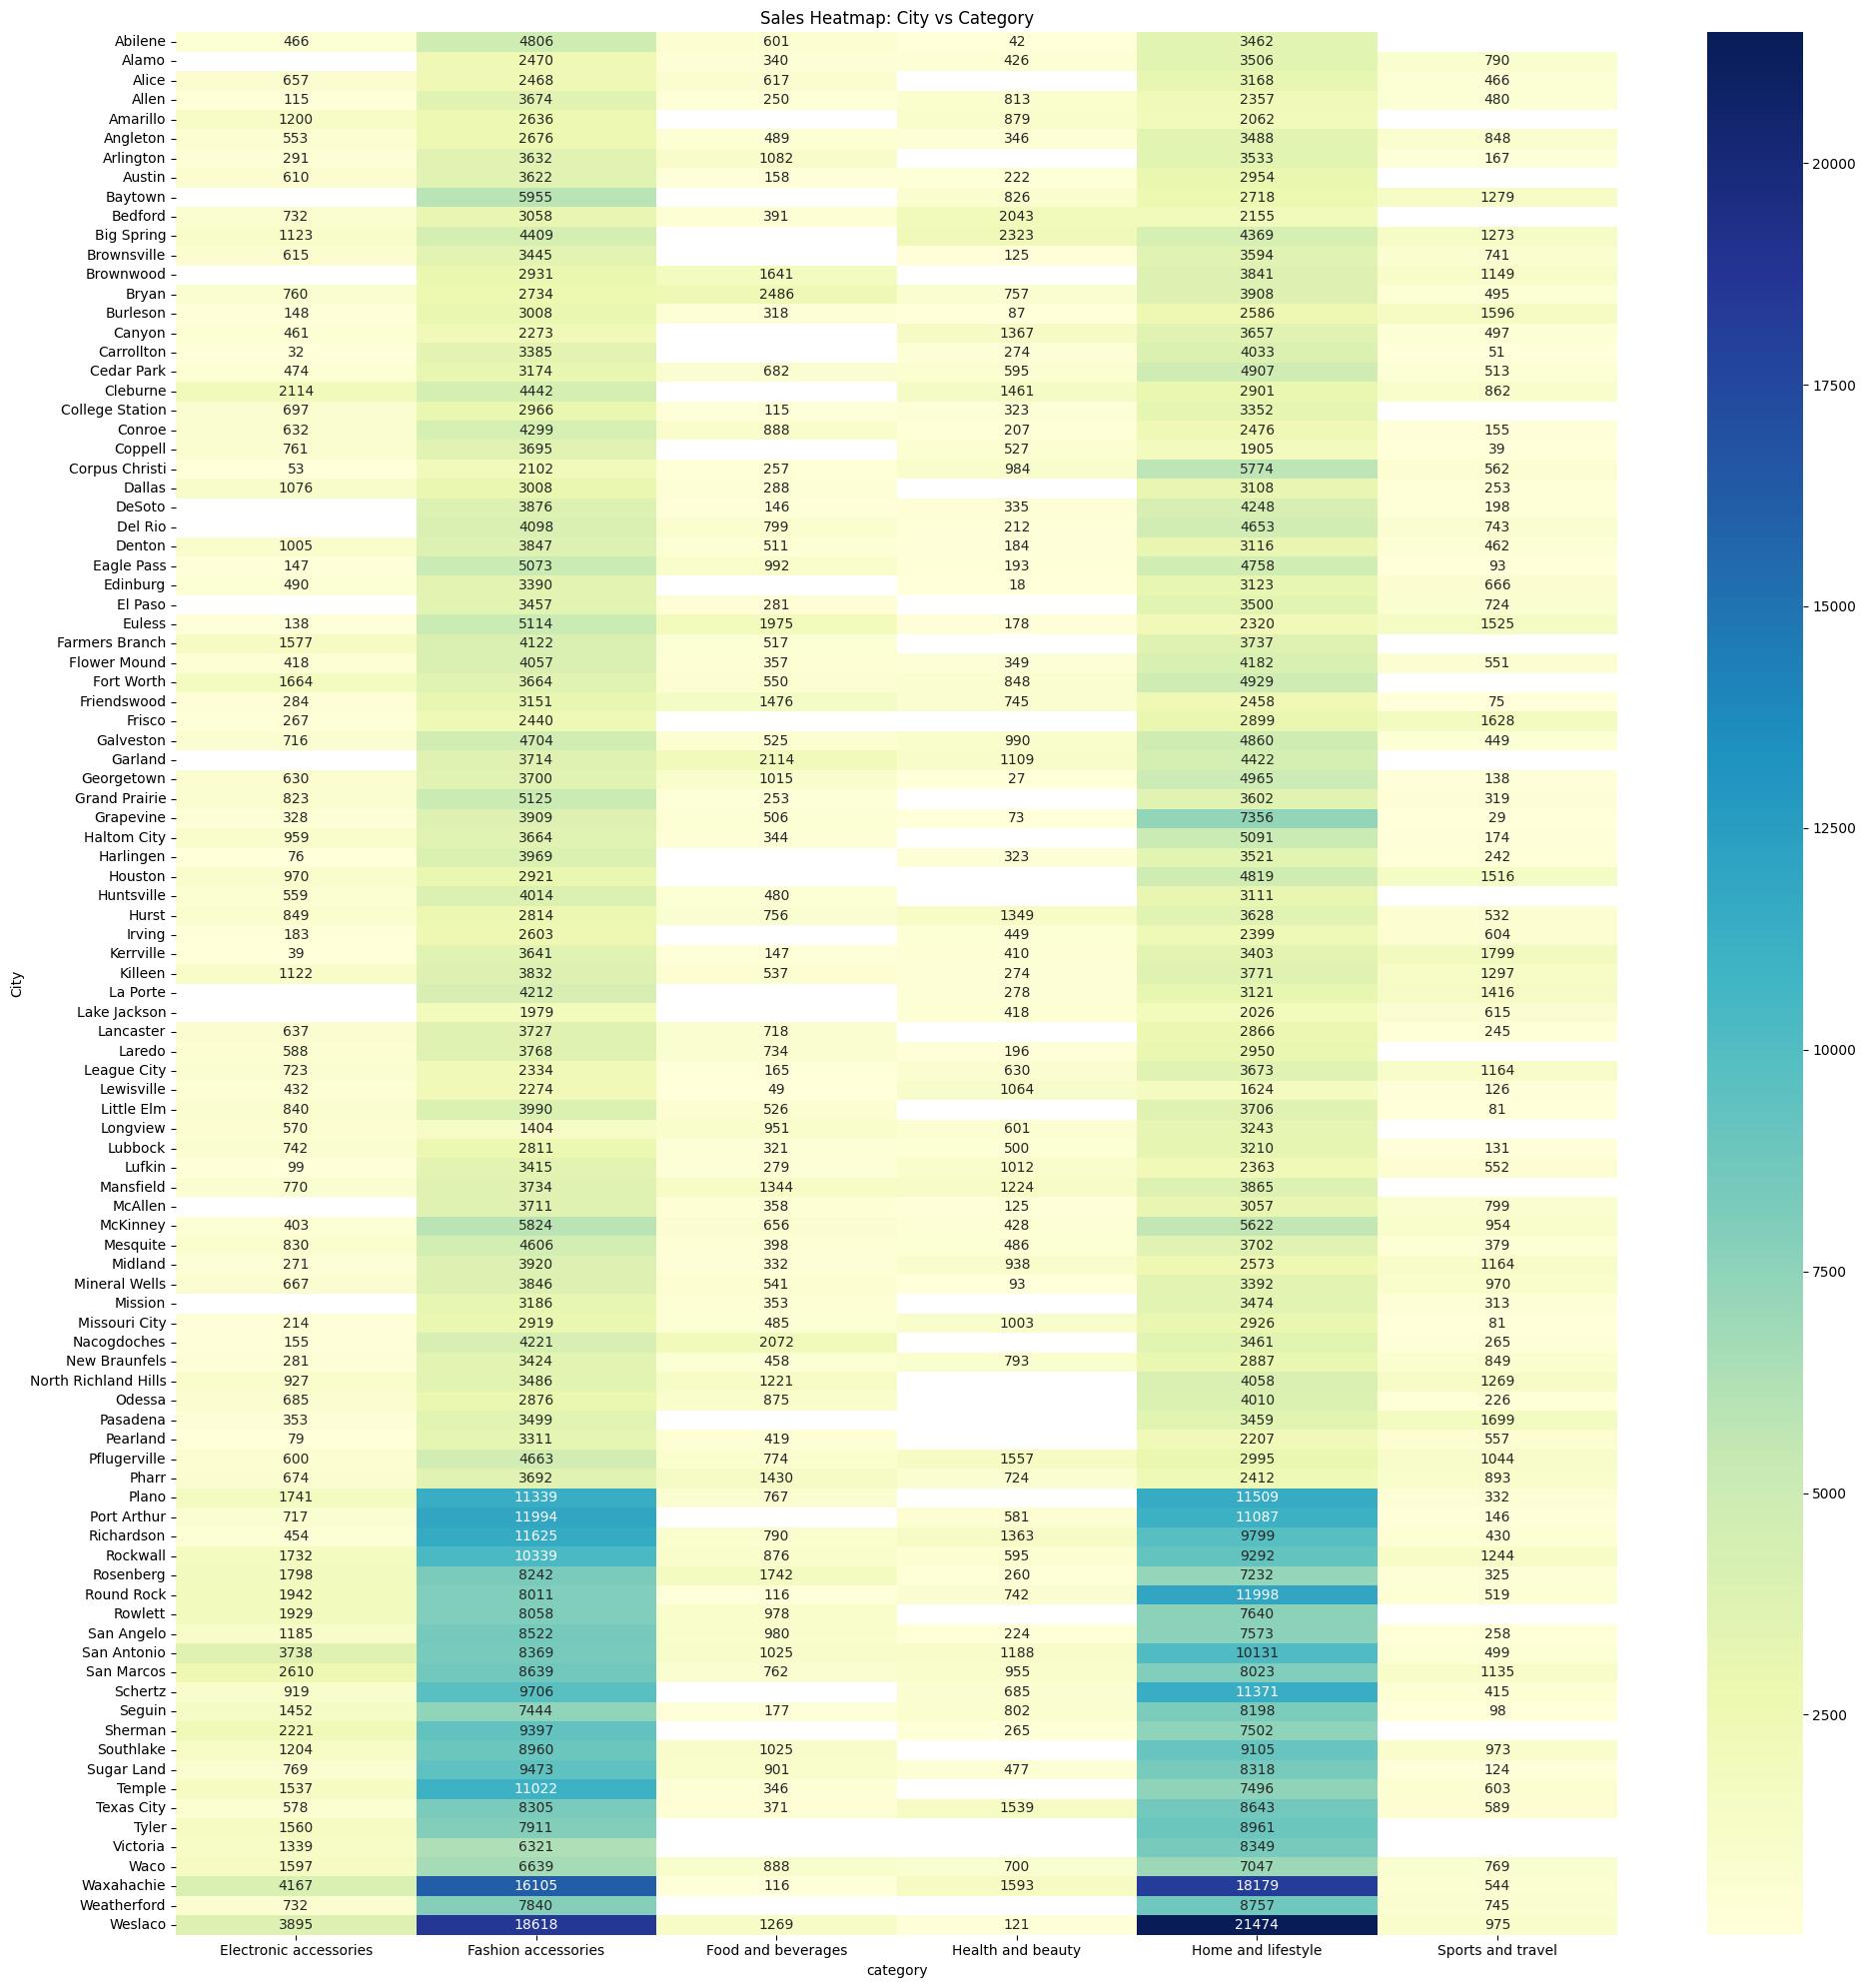

In [33]:
# Heatmap of City vs Category Sales

pivot = df.pivot_table(index='City', columns='category', values='total_price', aggfunc='sum')
plt.figure(figsize=(20, 20))
sns.heatmap(pivot, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title('Sales Heatmap: City vs Category')
plt.tight_layout()
plt.show()

**Export Cleaned Data**


In [34]:
df.to_csv('walmart_cleaned.csv', index=False)